In [1]:
import math as Math
from graphviz import Digraph

class Scalar:
    def __init__(self, data, grad = 0, op ='', deps = ()):
        self.data = data
        self.grad = grad
        self._op = op
        self._deps = set(deps)
    def __repr__(self):
        return f"Scalar(Value: {self.data} Grad: {self.grad})"
    def __add__(self, other):
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data + other.data, op = '+', deps = (self, other))
        return out
    def __radd__(self, other):
        return self + other # other + self
    def __sub__(self, other):
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data - other.data, op = '-', deps = (self, other))
        return out
    def __rsub__(self, other):
        return -self + other # -(other - self)
    def __neg__(self):
        return -1 * self
    def __mul__(self, other):
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data * other.data, op = '*', deps = (self, other))
        return out
    def __rmul__(self, other):
        return self * other # other * self
    def __pow__(self, other):
        other = other if isinstance(other, Scalar) else Scalar(other)
        out = Scalar(self.data ** other.data, op = '**', deps = (self, other))
        return out
    def __rpow__(self, other):
        return self ** other # other ** self
    def __truediv__(self, other):
        return self * (other ** -1)
    def exp(self):
        return Math.e ** self # e**self
    def log10(self):
        out = Math.log10(self.data)
        return Scalar(out, op = 'log10', deps = (self,))
    def ln(self):
        out = Math.log(self.data)
        return Scalar(out, oop ='ln', deps = (self,))
    #activations
    def relu(self):
        activation = self.data if self.data > 0 else 0
        return Scalar(activation, op = 'ReLu', deps = (self,))
    def tanh(self):
        expo = (2 * self).exp()
        activation = (expo - 1)/(expo + 1)
        return Scalar(activation, op = 'tanh', deps = (self,))


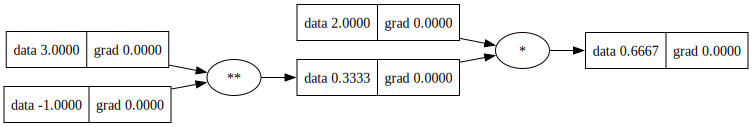

In [2]:
a = Scalar(2)
b = Scalar(3)
c = a/b

dot = draw_dot(c)
dot